In [281]:
import numpy as np
import matplotlib.pyplot as plt

In [353]:
def cities_dic(D):
    '''Initialize hacseble structure to store coordinates of cities'''
    
    #names of cities
    alphabet = 'ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz' 
    individuals = {}
    for d in range(D): #randomly choose coordinates
        x = np.random.randint(200)
        y = np.random.randint(200)
        #fill in dictionary with cities and coordinates   
        individuals[alphabet[d]] = (x,y) 
    return individuals

In [370]:
def generate_population(D, NP):
    '''Returns list with combinations of cities'''
    
    population = []
    for _ in range(NP): #append list with random combinations 
        population.append(sorted(cities, key = lambda x: np.random.randint(D)))
    return population

In [371]:
def dist(coordinates1, coordinates2):
    '''Calculates dustance between two sets of coordinates'''
    
    x1, y1 = coordinates1
    x2, y2 = coordinates2
    return ((x2-x1)**2 + (y2-y1)**2)**0.5

In [372]:
def total_dist(individual):
    '''Calculates total length of journey through all cities and back'''
    
    #unpacking of coordinates
    coordinates = [individual_dic.get(city) for city in individual] 
    return sum([dist(coordinates[i], coordinates[i+1-D]) for i in range(D)]) 
    

In [373]:
def plot_cities(individual):
    '''Returns plot with map of journey'''
    
    #unpacking coordinates using dictionary with cities
    x_points = [cities[i][0] for i in individual] 
    y_points = [cities[i][1] for i in individual]

    fig = plt.figure(figsize= (5,5))

    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Map of the cities')
    plt.xlim(0,220)
    plt.ylim(0,220)
    plt.plot(x_points, y_points, 'ko') #plot points
    plt.plot(x_points, y_points, 'r-') #plot lines between points
    
    #place city's name on the plot
    for city in individual:
        x, y = cities[city]
        plt.text(x, y+7, city, fontsize=11)

In [374]:
def genetic_algotithm(NP, G, D):
    '''Genetic algorithm for solving Travelling Salesman Problem
    
    Parameters:
    NP(int) -  Number of individuals in population
    G(int) - Number of generations
    D(int) - Number of cities to visit
    
    Description:
    Inside every generation: In a loop select parent_A and 
    parent_B (randomly from population) -> crossover individuals -> 
    make additioanl single mutation ->  compare mutation with parent_A ->
    rewrite population
    '''
    population = generate_population(D, NP)

    for _ in range(G):
        new_population = population.copy()
        s = int(D*0.75) #initialize crossover index
        
        for ind in range(NP):
            parent_A = population[ind] #select the first parent
            
            list_ind = list(range(NP))
            list_ind.remove(ind) #exlude current index from a list
            #randomly select the second parent different from the first parent 
            parent_B = population[np.random.choice(list_ind)]
            
            #crossover two parents
            offspring_AB = parent_A[:s] + [x for x in parent_B if x not in parent_A[:s]]
            
            #make a single mutation randomly 
            if np.random.uniform() < 0.5:
                pos1, pos2 = np.random.choice(list(range(D)), 2)
                offspring_AB[pos1], offspring_AB[pos2] = offspring_AB[pos2], offspring_AB[pos1]
            
            #rewrite population if affspring is better then parent
            if total_dist(offspring_AB) < total_dist(parent_A):
                new_population[ind] = offspring_AB
            
            population = new_population
            best = sorted(population, key = lambda x: total_dist(x))[0]
    
    print('Best combination: {}'.format(best))
    print('Shortest distance: {}'.format(round(total_dist(best))))
    return best

In [424]:
cities = cities_dic(20)

Best combination: ['K', 'T', 'N', 'F', 'R', 'H', 'D', 'G', 'S', 'A', 'E', 'P', 'C', 'J', 'I', 'Q', 'L', 'O', 'B', 'M']
Shortest distance: 842


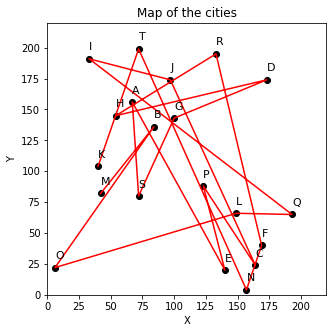

In [427]:
best = genetic_algotithm(20, 2000, 20)
plot_cities(best)